>
> # MaaSSim tutorial

 ### quickstart

In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

prepare

In [2]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate

In [3]:
params = get_config('../../data/config/default.json')  # load configuration

In [4]:
params.nP = 2  # parameterize supply 
params.nV = 1  # and demand

In [5]:
inData = load_G(inData, params)  # load network graph 

In [6]:
inData = prep_supply_and_demand(inData, params)  # generate supply and demand

simulate

In [7]:
sim = simulate(params = params, inData = inData) # simulate

08-10-20 13:20:56-WARNING-Setting up 1h simulation at 2020-10-08 13:17:20 for 1 vehicles and 2 passengers in Nootdorp, Netherlands
08-10-20 13:20:56-INFO--------------------	Starting simulation	-------------------
08-10-20 13:20:56-INFO-pax    0  got to dest at                           2020-10-08 13:22:30
08-10-20 13:20:56-INFO-pax    1  got to dest at                           2020-10-08 13:27:44
08-10-20 13:20:56-INFO-veh    1  quitted shift                            2020-10-08 16:17:19
08-10-20 13:20:56-INFO--------------------	Simulation over		-------------------
08-10-20 13:20:56-INFO-queue of requests 0
08-10-20 13:20:56-WARNING-simulation time 0.1 s
08-10-20 13:20:56-WARNING-assertion tests for simulation results - passed


### walkthrough

demand structure

In [8]:
inData.requests.head(2)

,pax_id,origin,destination,treq,tdep,ttrav,tarr,tdrop,shareable,schedule_id,dist,platform,ride_id,position,sim_schedule
0,0,44987841,45003346,2020-10-08 13:17:20,NaN,00:00:58,2020-10-08 13:18:18,NaN,False,NaN,582,0,0,0,node time req_id od 0 NaN...
1,1,520820370,45033209,2020-10-08 13:17:51,NaN,00:03:15,2020-10-08 13:21:06,NaN,False,NaN,1950,0,1,0,node time req_id od 0 N...


In [9]:
inData.vehicles.head(2)

,pos,event,shift_start,shift_end,platform,expected_income
veh,,,,,,
1,45033209.0,driverEvent.ENDS_SHIFT,0,86400,0,NaN


In [10]:
inData.passengers.head(2)

,pos,event,platforms
0,44987841,NaN,[0]
1,520820370,NaN,[0]


#### visualize the demand

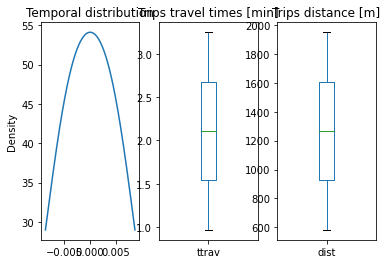

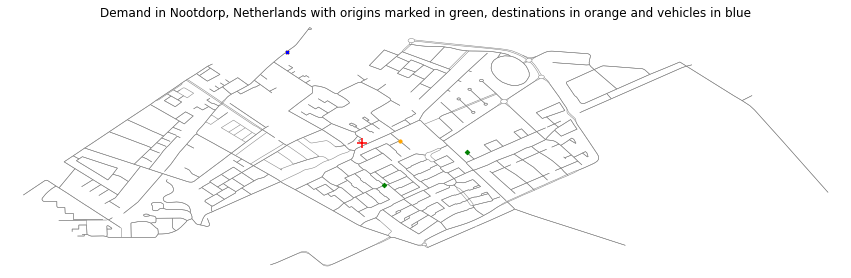

In [11]:
#import matplotlib.pyplot as plt
#inData.requests['dist'] = [inData.skim[request.origin]
#                           [request.destination] for _, request in inData.requests.iterrows()]     
from MaaSSim.visualizations import plot_demand
plot_demand(inData, vehicles = True, s = 10, params = params)

#### results (raw)

In [12]:
list(sim.runs.keys()) #consecutive runs

[0]

In [13]:
list(sim.runs[0].keys()) # single run results

['trips', 'outcomes', 'rides', 'queues']

passengers raw results

In [14]:
sim.runs[0].trips.head(10) #trip segment reports

,pax,pos,t,event,veh_id
0,0,44987841,0,STARTS_DAY,NaN
1,0,44987841,0,REQUESTS_RIDE,NaN
2,0,44987841,0,RECEIVES_OFFER,NaN
3,0,44987841,15,ACCEPTS_OFFER,NaN
4,0,44987841,35,ARRIVES_AT_PICKUP,1.0
5,0,44987841,212,MEETS_DRIVER_AT_PICKUP,1.0
6,0,44987841,242,DEPARTS_FROM_PICKUP,1.0
7,0,45003346,300,ARRIVES_AT_DROPOFF,1.0
8,0,45003346,310,SETS_OFF_FOR_DEST,NaN
9,0,45003346,310,ARRIVES_AT_DEST,NaN


vehicles raw results

In [15]:
df = sim.runs[0].rides
df[df.veh == 1]

,veh,pos,t,event,paxes
0,1,44969496.0,0,STARTS_DAY,[]
1,1,44969496.0,0,OPENS_APP,[]
2,1,44969496.0,0,RECEIVES_REQUEST,[]
3,1,44969496.0,15,ACCEPTS_REQUEST,[]
4,1,44969496.0,35,IS_ACCEPTED_BY_TRAVELLER,[]
5,1,44987841.0,212,ARRIVES_AT_PICKUP,[]
6,1,44987841.0,212,MEETS_TRAVELLER_AT_PICKUP,[]
7,1,44987841.0,242,DEPARTS_FROM_PICKUP,[0]
8,1,45003346.0,300,ARRIVES_AT_DROPOFF,[0]
9,1,45003346.0,310,RECEIVES_REQUEST,[]


### visualization

In [16]:
df = sim.runs[0].trips
df = df[df.pax == 1]
df

,pax,pos,t,event,veh_id
0,1,520820370,0,STARTS_DAY,NaN
1,1,520820370,31,REQUESTS_RIDE,NaN
2,1,520820370,310,RECEIVES_OFFER,NaN
3,1,520820370,310,ACCEPTS_OFFER,NaN
4,1,520820370,330,ARRIVES_AT_PICKUP,1.0
5,1,520820370,389,MEETS_DRIVER_AT_PICKUP,1.0
6,1,520820370,419,DEPARTS_FROM_PICKUP,1.0
7,1,45033209,614,ARRIVES_AT_DROPOFF,1.0
8,1,45033209,624,SETS_OFF_FOR_DEST,NaN
9,1,45033209,624,ARRIVES_AT_DEST,NaN


<AxesSubplot:>

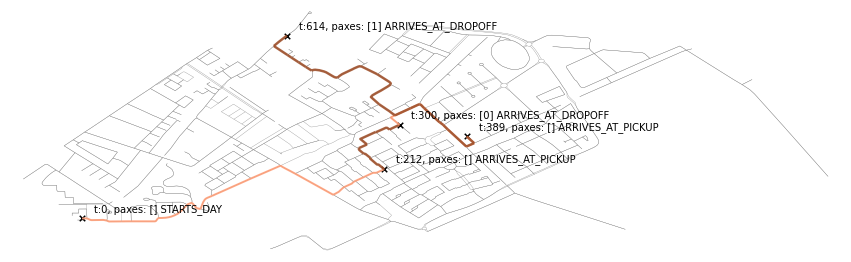

In [17]:
from MaaSSim.visualizations import plot_veh
df = sim.runs[0].rides
plot_veh(inData.G, df[df.veh ==1])

### results processed

In [18]:
sim.output() # call to generate reports

In [19]:
list(sim.res[0].keys())

['pax_exp', 'pax_kpi', 'veh_exp', 'veh_kpi']

In [20]:
sim.res[0].pax_kpi

,ACCEPTS_OFFER,ARRIVES_AT_DROPOFF,ARRIVES_AT_PICKUP,DEPARTS_FROM_PICKUP,MEETS_DRIVER_AT_PICKUP,RECEIVES_OFFER,REQUESTS_RIDE,SETS_OFF_FOR_DEST,STARTS_DAY,IS_REJECTED_BY_VEHICLE,REJECTS_OFFER,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE,nP
sum,15.0,253.000000,40.0,60.0,236.0000,279.0,31.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,2
mean,15.0,126.500000,20.0,30.0,118.0000,279.0,31.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,2
std,NaN,96.873629,0.0,0.0,83.4386,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [21]:
sim.res[0].veh_kpi.T.head(1)

,sum,mean,std
nRIDES,2.0,2.0,NaN


In [22]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,ARRIVES_AT_PICKUP,MEETS_TRAVELLER_AT_PICKUP,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,CONTINUES_SHIFT,STARTS_REPOSITIONING,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT
veh,,,,,,,,,,,,,,,,,,,
1,2,0.0,False,0,0,10.0,15.0,0,40.0,0,236.0,0,60.0,253.0,0,0,0,0,10185.0


In [23]:
sim.res[0].pax_exp.tail()

,ACCEPTS_OFFER,ARRIVES_AT_DROPOFF,ARRIVES_AT_PICKUP,DEPARTS_FROM_PICKUP,MEETS_DRIVER_AT_PICKUP,RECEIVES_OFFER,REQUESTS_RIDE,SETS_OFF_FOR_DEST,STARTS_DAY,IS_REJECTED_BY_VEHICLE,REJECTS_OFFER,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE
pax,,,,,,,,,,,,,,
0,15.0,58.0,20.0,30.0,177.0,NaN,NaN,10.0,0,0,0,0,0,0
1,NaN,195.0,20.0,30.0,59.0,279.0,31.0,10.0,0,0,0,0,0,0


-----